In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("NetflixData.csv", engine='python', on_bad_lines='skip', encoding='latin1')

## **Questions:**

1) What is the most frequent genre of movies released no Netflix?
2) What genres has highest votes?
3) What movie got the highest popularity? whats its genre?
4) What movie got the lowest popularity? whats its genre?
5) Which year has the most filmmed movies?

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [5]:
df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [6]:
def str_to_numeric(df, columns):
    for cols in columns:
        df[cols] = pd.to_numeric(df[cols], errors='coerce')
    return df

In [7]:
columns = ['Vote_Count', 'Vote_Average']
df = str_to_numeric(df, columns)

In [8]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.000000,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.000000,0.000000
25%,16.127500,146.000000,5.900000
50%,21.191000,444.000000,6.500000
75%,35.174500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

**Exploration Summary:**

- We have a dataset consisting 9826 rows and 9 columns.
- Now our dataset looks a bit tidy with no NaNs and duplicated values.
- Release_Date column needs to be casted into date-time and to extract only the year value.
- Overview, Original_Language, and Poster_Url wouldn't be so useful during analysis, so we'll drop them.
- There is noticable outliers in Popularity column.
- Vote_Average better be categorised for proper analysis.
- Genre column has comma saperated values and white spaces that needs to be handled and casted into category exploration summary

In [12]:
df.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [13]:
df.drop(columns=['Overview', 'Original_Language', 'Poster_Url'], inplace=True)

In [14]:
df.head(3)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122.0,6.3,Thriller


In [15]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'].dtypes

dtype('<M8[ns]')

In [16]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [17]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,6.3,Thriller
3,2021,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


**Categorizing `Vote_Average` column**

We would cut the **`Vote_Average`** values and make **`4`** categoris: **`popular`** **`average`** **`below_avg`** **`not_popular`** to describe it more using **`categorize_col()`** function provided above.

In [18]:
def categorize_col(df, cols, labels):
    
    edges = [df[cols].describe()['min'],
            df[cols].describe()['25%'],
            df[cols].describe()['50%'],
            df[cols].describe()['75%'],
            df[cols].describe()['max']]
    
    df[cols] = pd.cut(df[cols], edges, labels = labels, duplicates = 'drop')
    return df

In [19]:
labels = ['not_populer', 'below_avg', 'average', 'populer']
categorize_col(df, 'Vote_Average', labels).head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,populer,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,populer,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,below_avg,Thriller
3,2021,Encanto,2402.201,5076.0,populer,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War"


In [20]:
df['Vote_Average'].value_counts()

Vote_Average
not_populer    2467
populer        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [21]:
df.isnull().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [22]:
df.dropna(inplace=True)
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

## We'd split genres into a list and then explode our dataset to have only one genre per row for each movie

In [28]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)

In [29]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,populer,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,populer,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,populer,Science Fiction
3,2022,The Batman,3827.658,1151.0,populer,Crime
4,2022,The Batman,3827.658,1151.0,populer,Mystery


In [30]:
# Custing column into category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(2), int32(1), object(1)
memory usage: 749.6+ KB


In [32]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

## **Data Visualizetion**

In [35]:
sns.set_style('whitegrid')

## 1. What is the most frequent genre of movies released no Netflix?

In [36]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

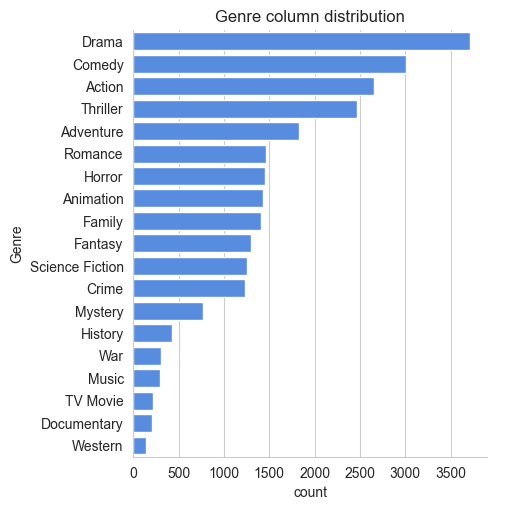

In [37]:
sns.catplot(y = 'Genre', data=df, kind='count', 
            order=df['Genre'].value_counts().index,
            color = '#4287f5')

plt.title("Genre column distribution")
plt.show()

## 2. What genres has highest votes?

In [38]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,populer,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,populer,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,populer,Science Fiction
3,2022,The Batman,3827.658,1151.0,populer,Crime
4,2022,The Batman,3827.658,1151.0,populer,Mystery


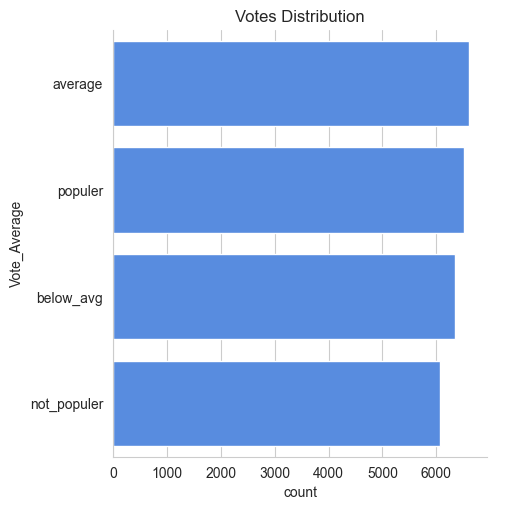

In [41]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')

plt.title('Votes Distribution')
plt.show()

## 3. What movie got the highest popularity? whats its genre?

In [43]:
df.head(1)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,populer,Action


In [44]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,populer,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,populer,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,populer,Science Fiction


## 4. What movie got the lowest popularity? whats its genre?

In [45]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152.0,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152.0,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152.0,average,History
25548,1984,Threads,13.354,186.0,populer,War
25549,1984,Threads,13.354,186.0,populer,Drama
25550,1984,Threads,13.354,186.0,populer,Science Fiction


## 5. Which year has the most filmmed movies?

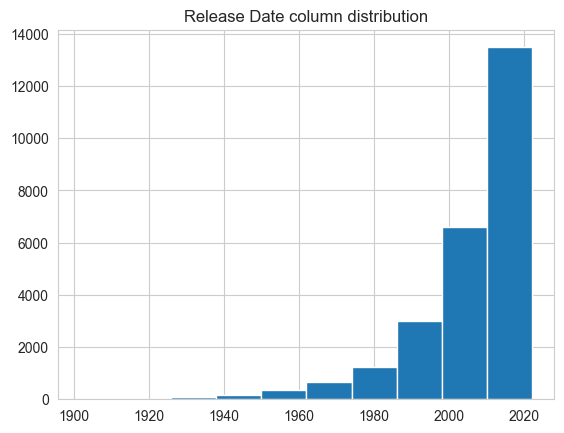

In [46]:
df['Release_Date'].hist()
plt.title('Release Date column distribution')
plt.show()